For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

Cement
Blast Furnace Slag
Fly Ash
Water
Superplasticizer
Coarse Aggregate
Fine Aggregate


In this project, I will build a regression model using the Keras library to model the data about concrete compressive strength.

# A

### Import the pandas and numpy libraries

In [63]:
import pandas as pd
import numpy as np

In [64]:
## Load the dataset into a pandas dataframe

In [65]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [66]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [67]:
concrete_data.shape

(1030, 9)

1030 is a very small data for training this model. Overfitting is a likely problem to wncounter in this project. I will keep that in mind.

In [68]:
#Are there missing values in the data?
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

So, we have no missing values in the data. Let's get a rough statistics of the data

In [69]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Split the data into predictors and targets

In [70]:
conc_data_columns = concrete_data.columns

In [71]:
#Get all columns in the concrete_data to be predictors except the "Strength" column
predictors= concrete_data[conc_data_columns[conc_data_columns != 'Strength']]
target = concrete_data['Strength'] #Strength column

In [72]:
#check the first 5 rows of all the features in the predictors
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [73]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Normalize the data
Do this by substracting the mean and dividing by the standard deviation

In [74]:
# predictors_norm = (predictors - predictors.mean()) / predictors.std()
# predictors_norm.head()

### Save the number of Predictors

In [75]:
# n_cols = predictors_norm.shape[1]
# n_cols
#n_cols = predictors.shape

In [76]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
n_cols = predictors.shape[1]
n_cols

8

In [79]:
import keras

In [80]:
#Import the needed libraries for building regression model in keras
from keras.models import Sequential
from keras.layers import Dense

In [81]:
#Define a regression model
def regression_model():
    #create the model
    model = Sequential()
    
    
    #add model layers
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    #model.add(Dense(10, activation='relu'))
    
    model.add(Dense(1))
    
    #compile model suing MSE as a measure of model performance
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Build the Model

In [82]:
#build the model
model = regression_model()
model

## Train and Plot a Visualization of the Training History 

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 127.0248 - val_loss: 134.4733
Epoch 2/50
 - 0s - loss: 122.0904 - val_loss: 138.3354
Epoch 3/50
 - 0s - loss: 118.2474 - val_loss: 136.7926
Epoch 4/50
 - 0s - loss: 114.5840 - val_loss: 137.5732


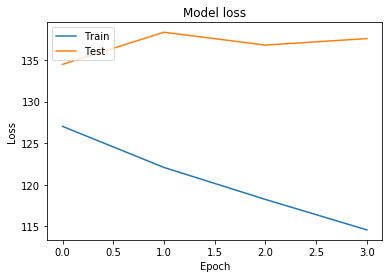

In [62]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#set early stopping monitor so thatthe model stops training when it can no longer improve its performance
early_stopping_monitor = EarlyStopping(patience=3)

#fit the model
history = model.fit(predictors_norm, target, validation_split = 0.3, 
                             epochs=50, 
                             verbose=2, 
                             callbacks=[early_stopping_monitor])


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()